In [209]:
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from shutil import copy, move
from pathlib import Path
from tqdm import tqdm
from PIL import Image

from skimage.metrics import structural_similarity as ssim
import numpy as np
from glob import glob

In [217]:
gt_root = Path("logs/2023-02-03T22-46-00_inshop_lip_clip_recon_newname/results/gt_jpg")
gt_files = glob(str(gt_root/'**/*.jpg'), recursive=True)
gt_files = [os.path.split(x)[-1] for x in gt_files]
len(gt_files)

8107

In [262]:
root = Path('logs/2023-02-03T22-46-00_inshop_lip_clip_recon_newname/results')

pise_root = Path('../pose_transfer_compare/pise/results/samples')
adgan_root = Path('../pose_transfer_compare/adgan/results/samples')
casd_root = Path('../pose_transfer_compare/casd/results/samples')
nted_root = Path('../pose_transfer_compare/nted/results/samples')
dptn_root = Path('../pose_transfer_compare/dptn/results/samples')

In [ ]:
adgan_root = Path('../pose_transfer_compare/adgan/images/')

In [261]:
file_root = Path('../pose_transfer_compare/dptn/results/samples/')
all_files = glob(str(file_root/'**/*.jpg'), recursive=True)
len(all_files)

8107

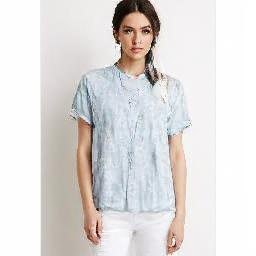

In [255]:
x = Image.open(all_files[0])
x

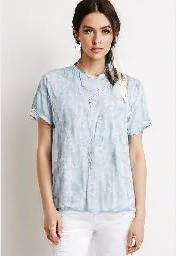

In [256]:
T.CenterCrop(size=(256, 176))(x)

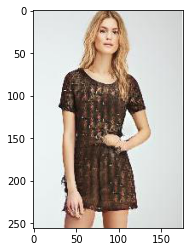

In [235]:
plt.imshow(np.array(x)[:,-176:,:])

In [236]:
np.array(x)[:,-176:,:].shape

(256, 176, 3)

In [199]:
# change file
for f in all_files[:]:
    new_f = f.replace('.jpg___','___')
    if new_f!=f and os.path.isfile(f):
        os.rename(f, new_f)


In [260]:
for f in all_files[:]:
    fname = os.path.split(f)[-1]
    if fname not in gt_files:
        new_fname = f.replace('/samples/','/excluded/')
        move(f, new_fname)

In [258]:
for f in all_files[:]:
    T.CenterCrop(size=(256, 176))(Image.open(f)).save(f)
    #new_image = np.array(Image.open(f))[:,-176:,:]
    #Image.fromarray(new_image).save(f)

In [257]:
all_files[0]

'../pose_transfer_compare/pise/results/samples/fashionWOMENJackets_Coatsid0000745002_3back___fashionWOMENJackets_Coatsid0000745002_4full.jpg'

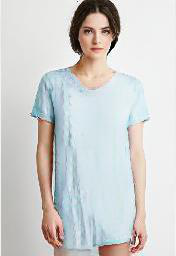

In [43]:
root = Path('logs/2023-02-03T22-46-00_inshop_lip_clip_recon_newname/results')
casd_root = Path('../CASD/results/resize/')
nted_root = Path('../Neural-Texture-Extraction-Distribution/result/fashion_256/inference/epoch_00200_iteration_000495400/')
dptn_root = Path('../Dual-task-Pose-Transformer-Network/results/fashion_results')

In [44]:
my_df = pd.read_csv(root/'metrics_png.csv')
casd_df = pd.read_csv(casd_root/'metrics.csv')
nted_df = pd.read_csv(nted_root/'../metrics.csv')


In [30]:
casd_df['name'] = casd_df['name'].map(lambda f: f.replace('.jpg','.png'))

In [31]:
df = pd.merge(my_df, casd_df, on='name', suffixes=('','_casd')).merge(nted_df, on='name', suffixes=('','_nted')).dropna()

In [32]:
df['ssim_diff_casd'] = df['SSIM'] - df['SSIM_casd']
df['ssim_diff_nted'] = df['SSIM'] - df['SSIM_nted']
df['ssim_diff_overall'] = 0.5*(df['ssim_diff_casd'] + df['ssim_diff_nted'])


In [33]:
df['lpips_diff_casd'] = df['LPIPS'] - df['LPIPS_casd']
df['lpips_diff_nted'] = df['LPIPS'] - df['LPIPS_nted']
df['lpips_diff_overall'] = 0.5*(df['lpips_diff_casd'] + df['lpips_diff_nted'])


In [127]:
df = my_df
df.set_index('name', inplace=True)

KeyError: "None of ['name'] are in the columns"

In [129]:
check_df = df.sort_values(by=['SSIM'], ascending=False)

In [130]:
check_df = check_df.loc[check_df.index.map(lambda x: 'Skirt' in x)]

fashionWOMENJackets_Coatsid0000018710_1front___fashionWOMENJackets_Coatsid0000018710_7additional.png.fashionWOMENJackets_Coatsid0000018710_1front___fashionWOMENJackets_Coatsid0000018710_7additional.png
fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png.fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png
Save to ./figures/pt_1c.jpg


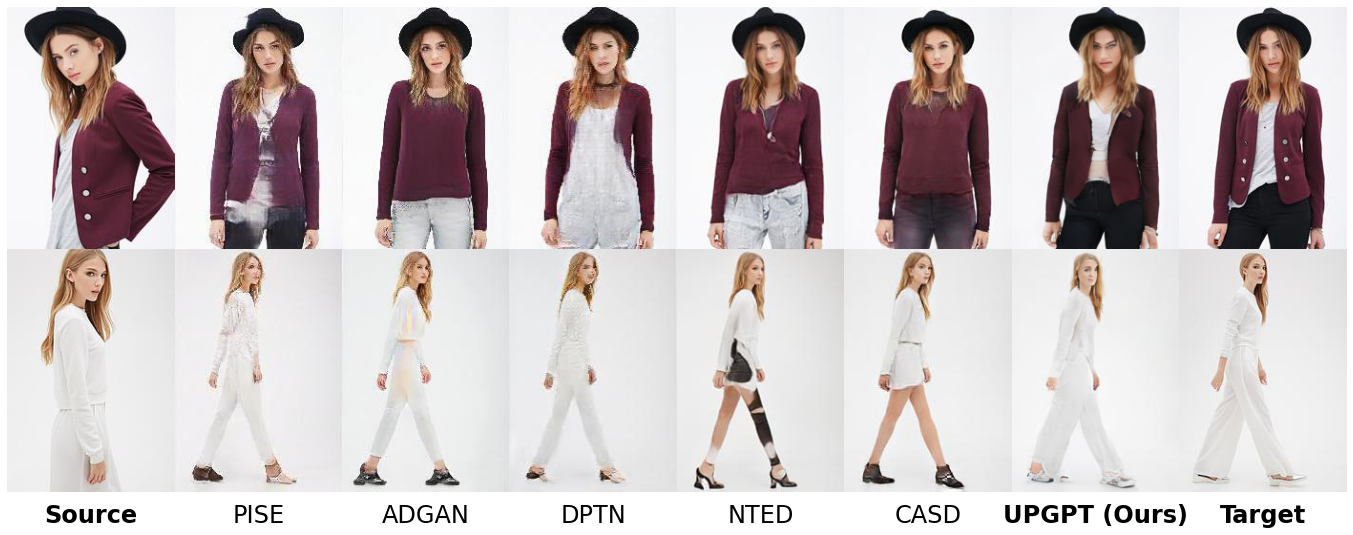

In [312]:
def display_selected(selected, save_path=None):

    number = min(5, len(selected))
    fig, axs = plt.subplots(number, 8, figsize=(24, 10))
    fig.subplots_adjust(wspace=0, hspace=-0.2)
    for i, n_row in enumerate(selected[:number]):
        row = df.loc[n_row]
        png_name = row.name
        jpg_name = png_name.replace('.png','.jpg')

        src = Image.open(root/'src'/png_name)
        target =  Image.open(root/'gt'/png_name)
        #smpl = Image.open(root/'smpl'/png_name)
        sample =  Image.open(root/'samples'/png_name)
        adgan = Image.open(adgan_root/jpg_name)
        pise = Image.open(pise_root/jpg_name)
        dptn = Image.open(dptn_root/jpg_name)        
        nted = Image.open(nted_root/jpg_name)
        casd = Image.open(casd_root/jpg_name)

        #concat = np.hstack([np.array(x) for x in [src, target, casd, nted, sample]])
        for j, im in enumerate([src, pise, adgan, dptn, nted, casd, sample, target]):
            axs[i,j].imshow(im)
            axs[i,j].axis('off')
            #axs[i].set_title(f'{n_row}.{row.name}:{row["ssim_diff_overall"]:.4f}')
            #axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")
        print(f'{n_row}.{row.name}')    
    for j, label in enumerate(['Source', 'PISE','ADGAN','DPTN','NTED','CASD',  'UPGPT (Ours)', 'Target']):
        if j in [0,6,7]:
            axs[i,j].set_title(label, y=-0.15, fontsize=24, weight='bold')
        else:
            axs[i,j].set_title(label, y=-0.15, fontsize=24)
        
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', transparent=False)
        print('Save to', save_path)

    
display_selected(list_better_seg, './figures/pt_1c.jpg')

0.fashionWOMENSkirtsid0000464402_1front___fashionWOMENSkirtsid0000464402_4full.png
1.fashionWOMENSkirtsid0000720202_1front___fashionWOMENSkirtsid0000720202_4full.png
2.fashionWOMENSkirtsid0000140204_1front___fashionWOMENSkirtsid0000140204_4full.png
3.fashionWOMENSkirtsid0000646309_4full___fashionWOMENSkirtsid0000646309_7additional.png
4.fashionWOMENSkirtsid0000698402_1front___fashionWOMENSkirtsid0000698402_4full.png


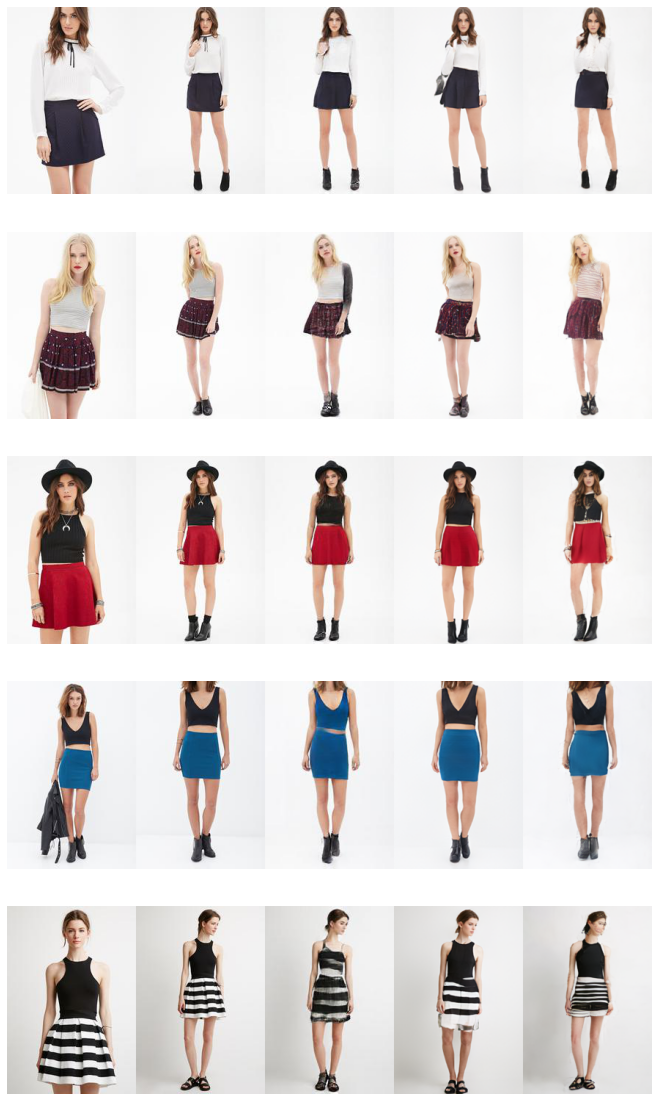

In [132]:
start_idx = 0
numbers = 5
fig, axs = plt.subplots(numbers,1, figsize=(20, numbers*4))

for i, n_row in enumerate(range(start_idx*numbers, start_idx*numbers+numbers)):
    row = check_df.iloc[n_row]
    png_name = row.name
    jpg_name = png_name.replace('.png','.jpg')
    
    src = Image.open(root/'src'/png_name)
    target =  Image.open(root/'gt'/png_name)
    sample =  Image.open(root/'samples'/png_name)
    nted = Image.open(nted_root/png_name)
    casd = Image.open(casd_root/'samples'/jpg_name)
    
    concat = np.hstack([np.array(x) for x in [src, target, casd, nted, sample]])

    axs[i].imshow(concat)
    axs[i].axis('off')
    #axs[i].set_title(f'{n_row}.{row.name}:{row["ssim_diff_overall"]:.4f}')
    print(f'{n_row}.{row.name}')
    #axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

fashionWOMENJackets_Coatsid0000018710_1front___fashionWOMENJackets_Coatsid0000018710_7additional.png.fashionWOMENJackets_Coatsid0000018710_1front___fashionWOMENJackets_Coatsid0000018710_7additional.png
fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png.fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png


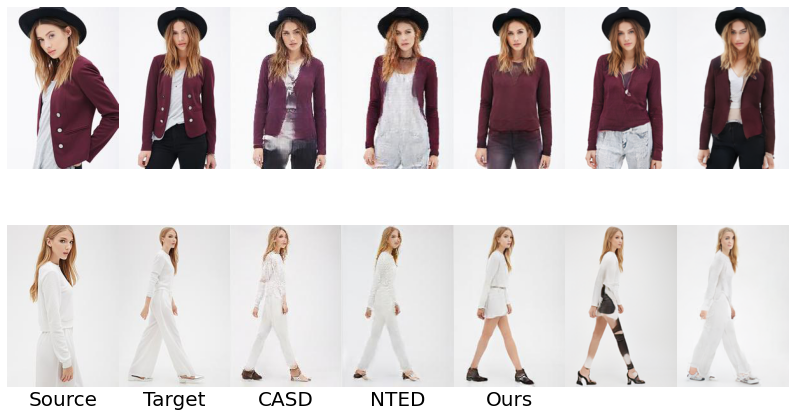

In [173]:
list_better_seg = [
                   #'fashionWOMENCardigansid0000136902_1front___fashionWOMENCardigansid0000136902_7additional.png',
                   #'fashionWOMENCardigansid0000028401_1front___fashionWOMENCardigansid0000028401_3back.png',
                   #'fashionWOMENRompers_Jumpsuitsid0000031402_1front___fashionWOMENRompers_Jumpsuitsid0000031402_7additional.png',
                   #'fashionWOMENCardigansid0000045005_3back___fashionWOMENCardigansid0000045005_1front.png',
                  #'fashionWOMENTees_Tanksid0000387704_2side___fashionWOMENTees_Tanksid0000387704_1front.png', #glasses
                   'fashionWOMENJackets_Coatsid0000018710_1front___fashionWOMENJackets_Coatsid0000018710_7additional.png',
                    'fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png',
                   
    #'fashionWOMENDressesid0000349902_7additional___fashionWOMENDressesid0000349902_4full.png'
]

display_selected(list_better_seg, )

fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png.fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png
fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_1front.png.fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_1front.png


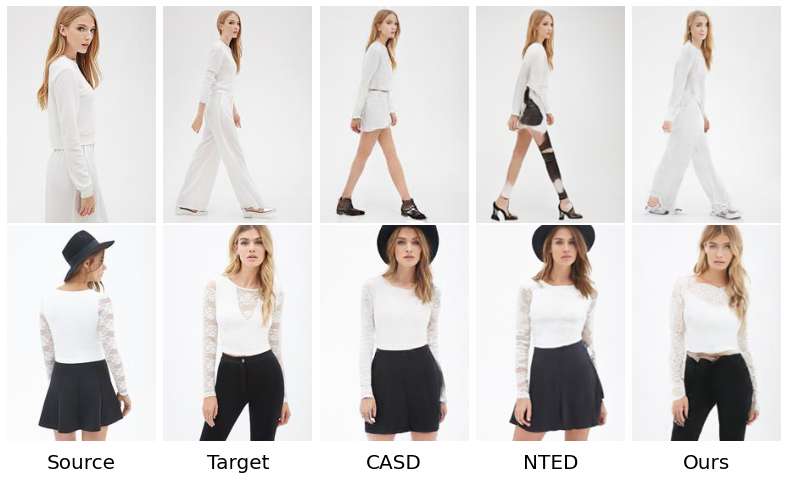

In [62]:
list_incomplete = [
    'fashionWOMENSweatshirts_Hoodiesid0000432702_2side___fashionWOMENSweatshirts_Hoodiesid0000432702_4full.png',
    'fashionWOMENTees_Tanksid0000584009_3back___fashionWOMENTees_Tanksid0000584009_1front.png',    
]
display_selected(list_incomplete)

Save to figures/pt_4.png


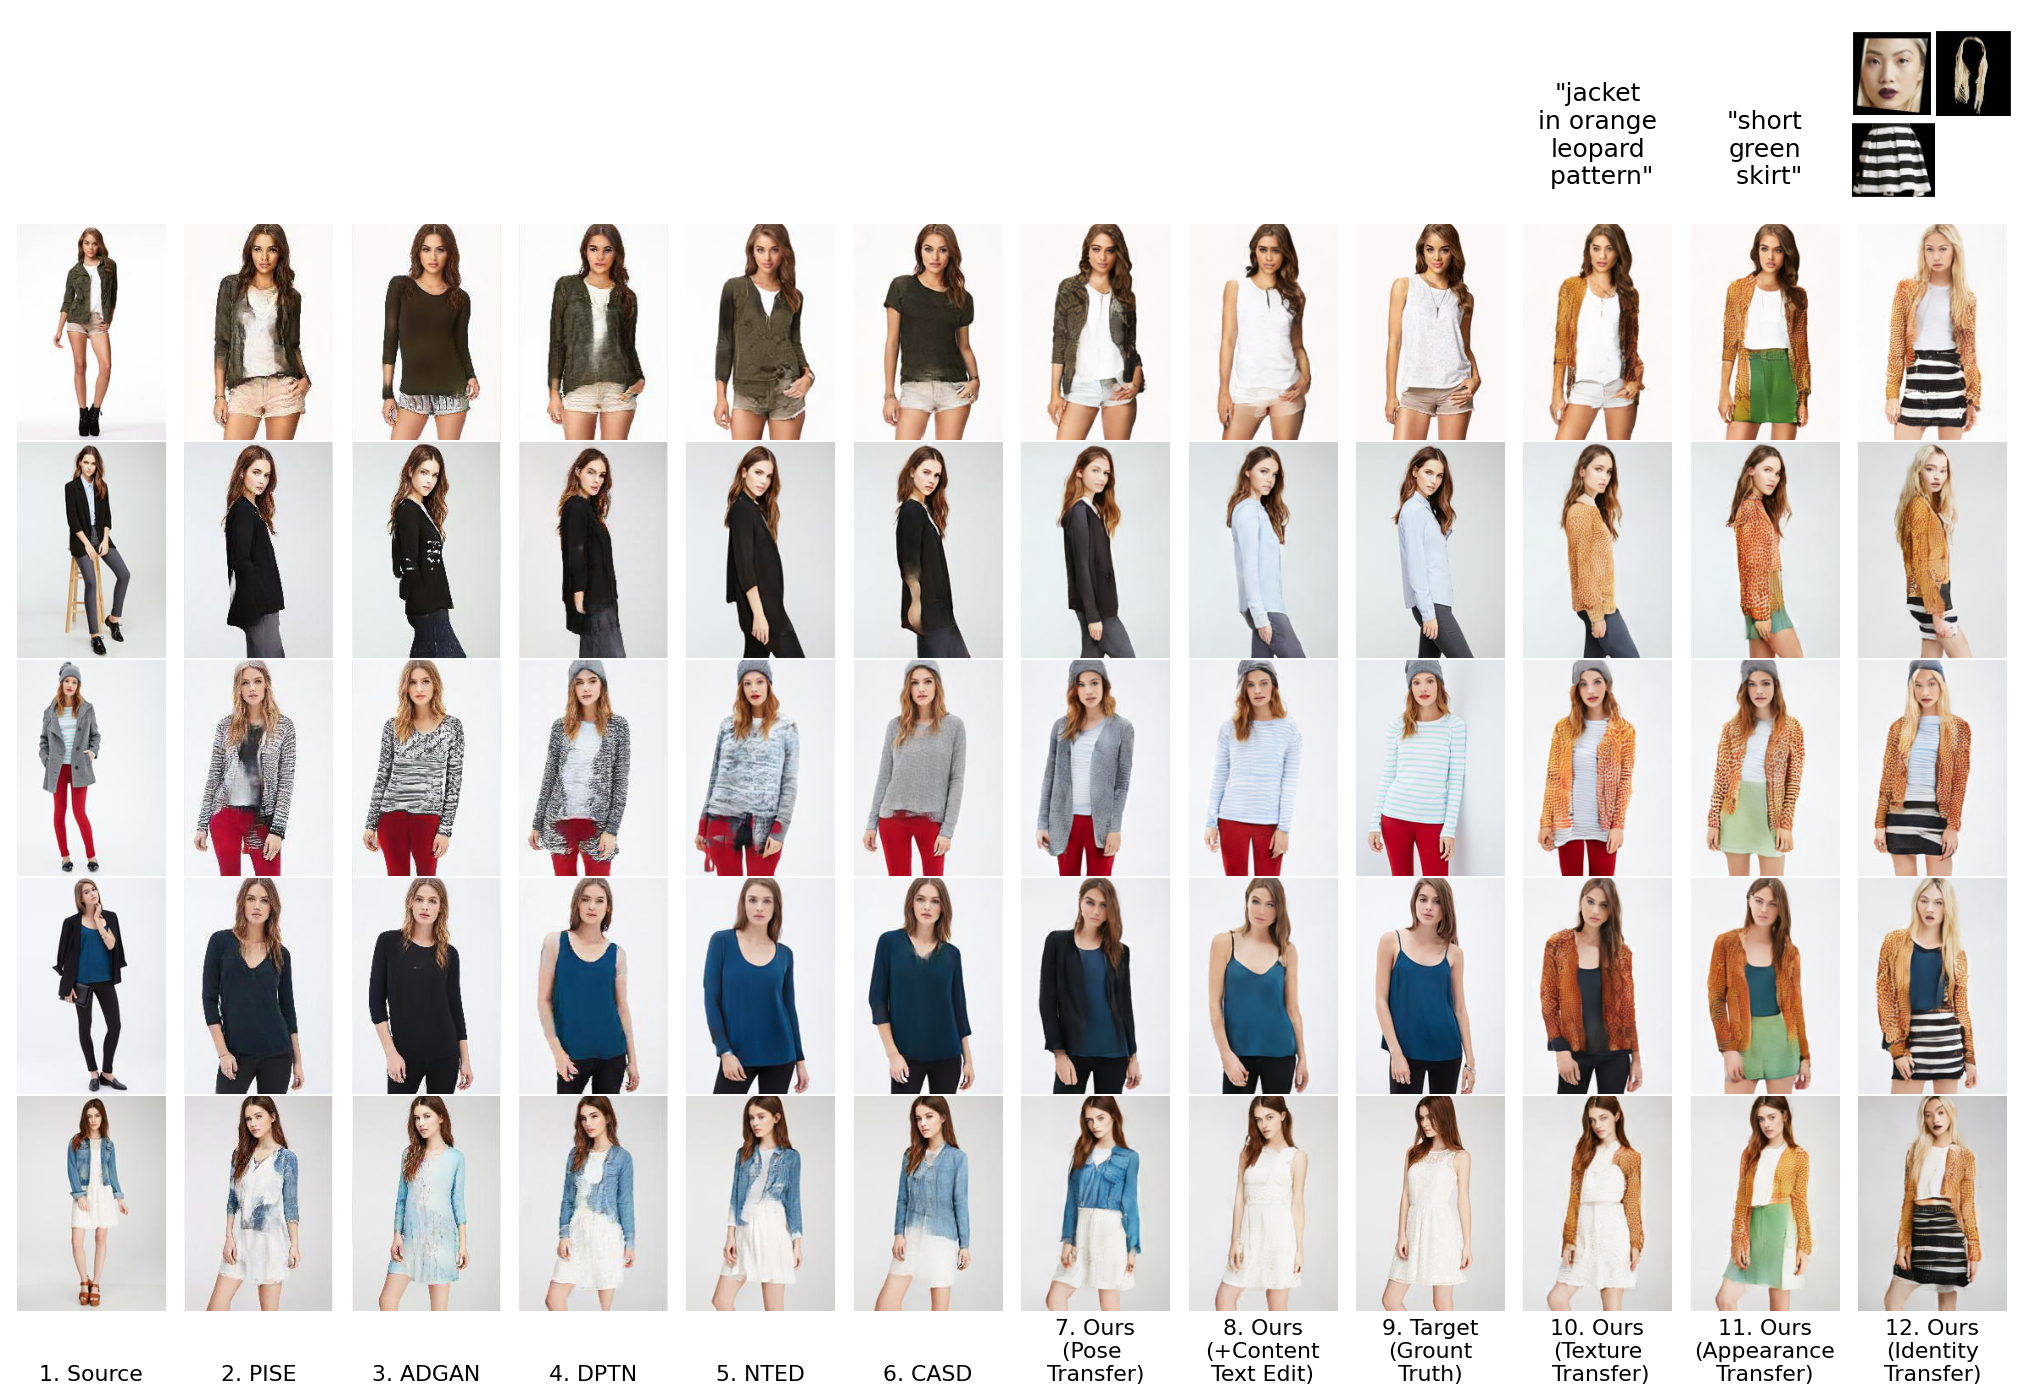

In [286]:
from torchvision import transforms as T
def display_edit(selected, save_path=None):
    text_edit_root = Path("./figures/text_edit/")
    #style_edit_root = Path("./figures/style_edit/")
    style_edit_root = Path("./figures/face/")
    skirt_edit_root = Path("./figures/skirt/")
    face_edit_root = Path("./figures/face_skirt2/")
    number = max(5, len(selected))+1
    n_cols = 12
    fig, axs = plt.subplots(number, n_cols, figsize=(n_cols*3, number*4))
    fig.subplots_adjust(wspace=0, hspace=0.01)
    
    # first row
    for j in range(n_cols):
        axs[0,j].axis('off')    
    #axs[0,3].set_title('reference', y=0.15, fontsize=25)
    #axs[0,4].set_title('papers', y=0.15, fontsize=25)
    axs[0,9].set_title('"jacket\nin orange\nleopard\n pattern"', y=0.15, fontsize=25)
    axs[0,10].set_title('"short\ngreen\n skirt"', y=0.15, fontsize=25)
    axs[0,11].imshow(Image.open('./figures/cond.jpg'))
    for i, n_row in enumerate(selected[:number]):
        row = df.loc[n_row]
        png_name = row.name
        jpg_name = png_name.replace('.png','.jpg')

        src = Image.open(root/'src'/png_name)
        target =  Image.open(root/'gt'/png_name)
        #smpl = Image.open(root/'smpl'/png_name)
        sample =  Image.open(root/'samples'/png_name)
        pise = Image.open(pise_root/jpg_name)
        adgan = Image.open(adgan_root/jpg_name)
        dptn = Image.open(dptn_root/jpg_name)
        nted = Image.open(nted_root/jpg_name)
        casd = Image.open(casd_root/jpg_name)
        
        text_edit =  Image.open(text_edit_root/png_name)
        style_edit =  Image.open(style_edit_root/png_name)
        skirt_edit =  Image.open(skirt_edit_root/png_name)
        face_edit =  Image.open(face_edit_root/png_name)

        columns = [[src, 'Source'],
                   [pise,'PISE'],
                   [adgan,'ADGAN'],
                   [dptn,'DPTN'],
                   [nted,'NTED'],
                   [casd,'CASD'],
                   [text_edit,'Ours\n(Pose \nTransfer)'],
                   [sample,'Ours\n(+Content\nText Edit)'],
                   [target,'Target\n(Grount\nTruth)'],
                   [style_edit,'Ours\n(Texture\n Transfer)'],
                   [skirt_edit,'Ours\n(Appearance\nTransfer)'],
                   [face_edit,'Ours\n(Identity\nTransfer)'],
                  ]
        for j in range(n_cols):
            axs[i+1,j].axis('off')
            axs[i+1,j].imshow(columns[j][0])

    
    for j, col in enumerate(columns):
        label = f'{j+1}. {col[1]}'
        axs[i+1,j].set_title(label, y=-0.35, fontsize=22)
        
    if save_path:
        plt.savefig(save_path)
        print('Save to', save_path)

    
display_edit(list_jacket,'figures/pt_4.png')

In [75]:
list_jacket = ['fashionWOMENShortsid0000478403_4full___fashionWOMENShortsid0000478403_1front.png',
'fashionWOMENBlouses_Shirtsid0000311501_7additional___fashionWOMENBlouses_Shirtsid0000311501_2side.png',
               #'fashionWOMENTees_Tanksid0000298802_4full___fashionWOMENTees_Tanksid0000298802_1front.png',
#'fashionWOMENTees_Tanksid0000788404_4full___fashionWOMENTees_Tanksid0000788404_2side.png',
'fashionWOMENTees_Tanksid0000397106_7additional___fashionWOMENTees_Tanksid0000397106_1front.png',
              'fashionWOMENTees_Tanksid0000664503_4full___fashionWOMENTees_Tanksid0000664503_3back.png',
              'fashionWOMENDressesid0000651901_4full___fashionWOMENDressesid0000651901_2side.png']
#display_selected(list_jacket, 'figures/pt_2.png')
#display_edit(list_jacket, )

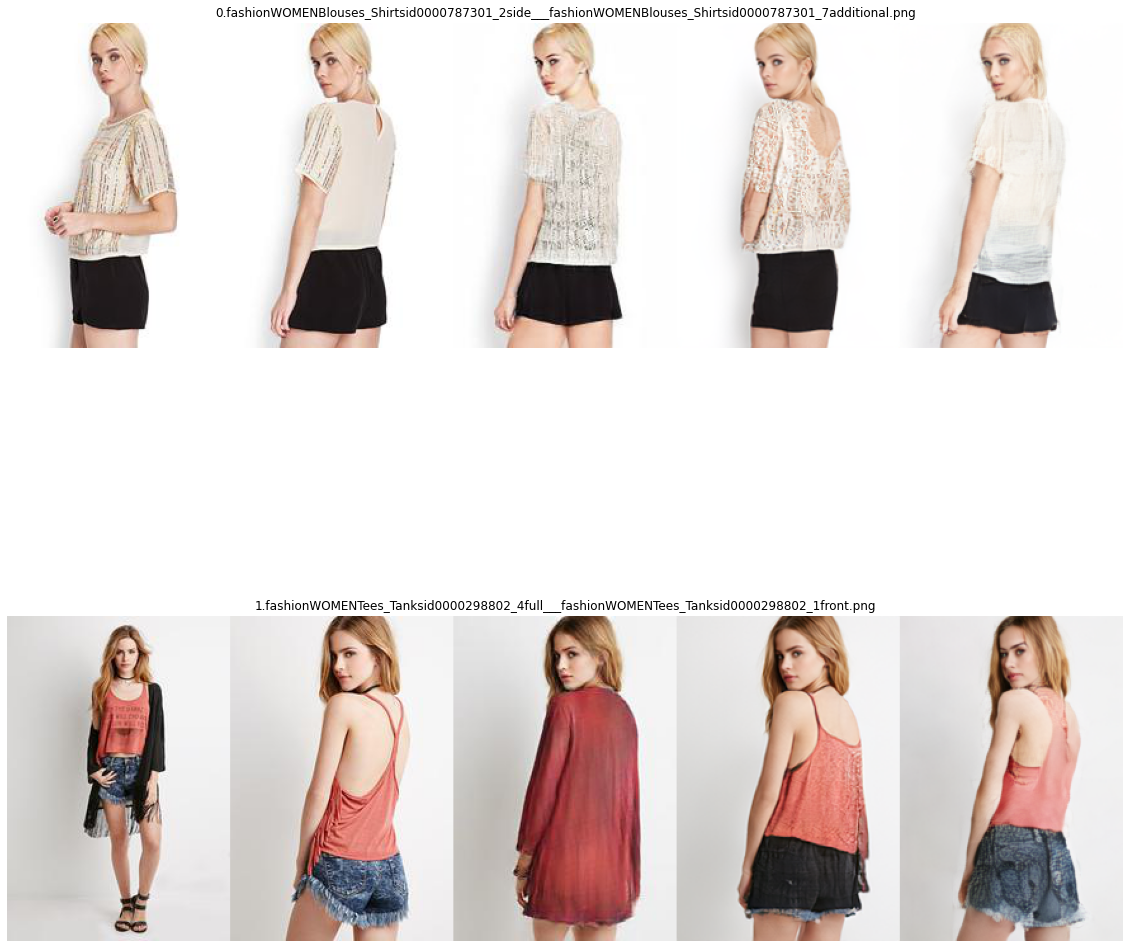

In [271]:
selected = [
    

    

'fashionWOMENBlouses_Shirtsid0000787301_2side___fashionWOMENBlouses_Shirtsid0000787301_7additional.png',
#'fashionWOMENTees_Tanksid0000298802_4full___fashionWOMENTees_Tanksid0000298802_7additional.png',



]

display_selected(selected)

In [311]:
def display_selected(selected):
    number = max(5, len(selected))

    fig, axs = plt.subplots(number,1, figsize=(20, 20))

    for i, n_row in enumerate(selected):
        row = df.loc[n_row]

        png_name = row.name
        jpg_name = png_name.replace('.png','.jpg')

        src = Image.open(root/'src'/png_name)
        target =  Image.open(root/'gt'/png_name)
        sample =  Image.open(root/'samples'/png_name)
        nted = Image.open(nted_root/png_name)
        casd = Image.open(casd_root/'samples'/jpg_name)

        concat = np.hstack([np.array(x) for x in [src, target, casd, nted, sample]])

        axs[i].imshow(concat)
        axs[i].axis('off')
        axs[i].set_title(f'{i}.{row.name}')
        #axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

In [25]:
my_df.iloc[0]['name']

'fashionMENTees_Tanksid0000678701_2side__fashionMENTees_Tanksid0000678701_1front_vis.jpg'

In [32]:
'fashionWOMENJackets_Coatsid0000745002_3back__fashionWOMENJackets_Coatsid0000745002_4full_vis.jpg' in list(my_df['name'])

True

In [15]:
df = pd.read_csv(root/'metrics.csv')

In [13]:
metric = 'SSIM'
df.sort_values(by=[metric], ascending=metric=='SSIM')[metric][:].mean()

0.702466618192924

In [69]:
df.head()

name      SSIM     LPIPS
0  1970.jpg  0.714059  0.190592
1  6314.jpg  0.777368  0.141038
2  2223.jpg  0.777880  0.148453
3  4972.jpg  0.829399  0.109999
4   678.jpg  0.529387  0.243801

In [56]:
sklearn_ssim = []
for i in tqdm(range(len(df))):
    fname = df.iloc[i]['name']
    sample = np.array(Image.open(root/f'samples/{fname}'))
    gt = np.array(Image.open(root/f'gt/{fname}'))
    sklearn_ssim.append(ssim(gt, sample, multichannel=True,
                             data_range=255))
    
print(np.mean(sklearn_ssim))

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8107/8107 [00:42<00:00, 188.83it/s]

0.6981076345080555


## SSIM

In [91]:
index = 2033
sample = np.array(Image.open(root/f'samples/{index}.jpg'))
gt = np.array(Image.open(root/f'gt/{index}.jpg'))
ssim(gt, sample, data_range=255, multichannel=True)

0.2780282292390281

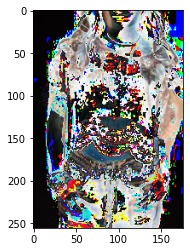

In [92]:
plt.imshow(sample-gt)

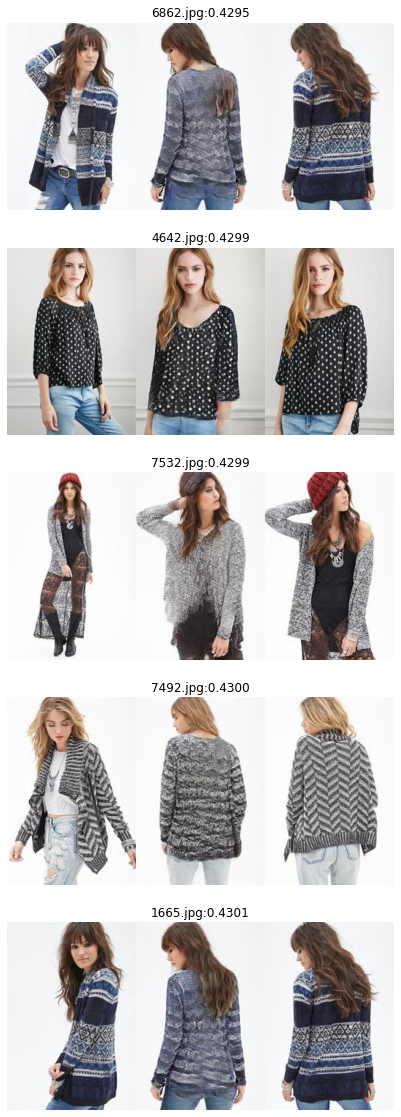

In [32]:
i = 80
check_df = df.sort_values(by=['SSIM'])[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

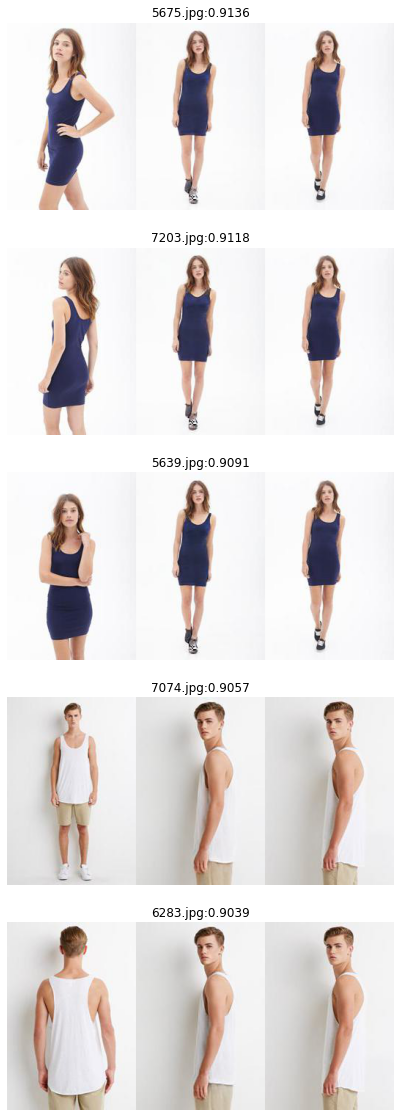

In [38]:
i = 0
check_df = df.sort_values(by=['SSIM'], ascending=False)[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['SSIM']:.4f}")

## LPIPS

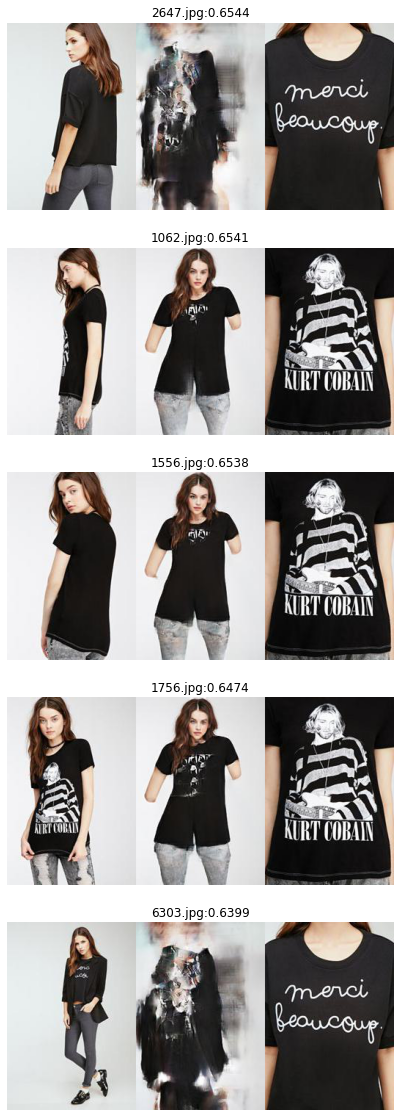

In [39]:
i = 0
check_df = df.sort_values(by=['LPIPS'], ascending=False)[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['LPIPS']:.4f}")
    

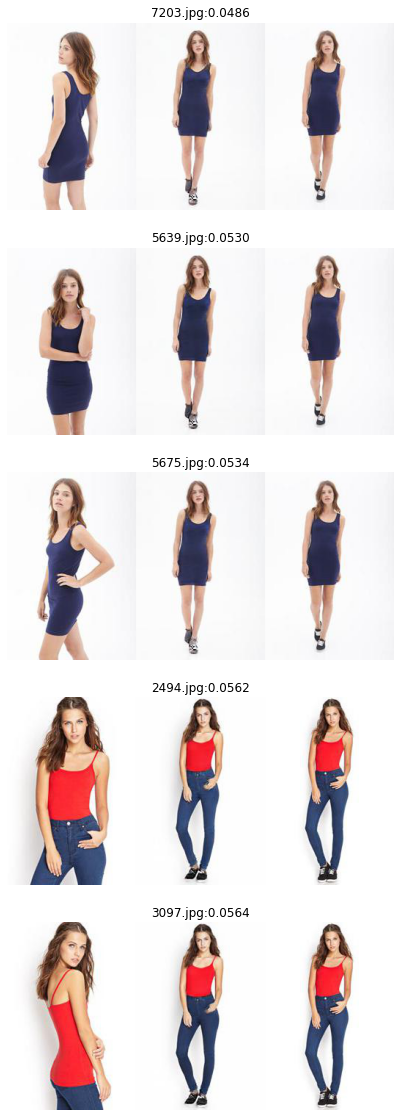

In [40]:
i = 0
check_df = df.sort_values(by=['LPIPS'])[i:i+5]
fig, axs = plt.subplots(len(check_df),1, figsize=(20, 20))
for i in range(len(check_df)):
    row = check_df.iloc[i]
    image = Image.open(root/'concats'/row['name'])
    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(f"{row['name']}:{row['LPIPS']:.4f}")
    
    

In [ ]:
class Loader(Dataset):
    def __init__(self, folder, shuffle=False):
        super().__init__()
        self.shuffle = shuffle
   
    def __len__(self):
        return len(self.images)
    
    def random_sample(self):
        return self.__getitem__(randint(0, self.__len__() - 1))

    def sequential_sample(self, ind):
        if ind >= self.__len__() - 1:
            return self.__getitem__(0)
        return self.__getitem__(ind + 1)

    def skip_sample(self, ind):
        if self.shuffle:
            return self.random_sample()
        return self.sequential_sample(ind=ind)

    @abstractmethod
    def __getitem__(self, ind):
        pass

In [12]:
src_root = Path('/home/soon/datasets/deepfashion_inshop/img_256')
dst_root = Path('/home/soon/datasets/deepfashion_inshop/pose_transfer_gt')
#os.makedirs(dst_root)

In [19]:
gt_files = glob(str(dst_root/'*.jpg'))

In [20]:
gt_files.sort()

In [21]:
gt_files

['/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/0.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/10.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/100.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1000.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1001.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1002.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1003.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1004.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1005.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1006.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1007.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1008.jpg',
 '/home/soon/datasets/deepfashion_inshop/pose_transfer_gt/1009.jpg',
 '/home/soon/datasets/deepfashion_inshop/po

In [6]:
df = pd.read_csv('pairs-test.csv')
files = df.to

In [15]:
for i, f in tqdm(enumerate(files[:])):
    src = str(src_root/f)
    dst = str(dst_root/f'{i}.jpg')
    copy(src, dst)

8175it [00:00, 20775.33it/s]


In [76]:
ind = 4
sample = df.iloc[ind]
image_file = str(root_dir / sample.image)


In [77]:
face_files = image_file.replace(folder, face_folder)
face_folder = os.path.dirname(face_files)
face_embed_files = glob(os.path.join(face_folder,'*.p'))
face_embed_file = random.choice(face_embed_files)
face_file = face_file.replace('.p', '.jpg')


print(face_file)

/home/soon/datasets/deepfashion/inshop_vggface/WOMEN/Sweaters/id_00005229
/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/WOMEN/Sweaters/id_00005229/03_2_side.jpg


In [78]:
face_embed_file

'/home/soon/datasets/deepfashion/inshop_vggface/WOMEN/Sweaters/id_00005229/03_2_side.p'

In [50]:
!ls $folder

MEN  MEN.zip  smpl  WOMEN  WOMEN.zip


In [51]:
image_file

'/home/soon/datasets/deepfashion_inshop/img/WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [52]:
folder

'/home/soon/datasets/deepfashion_inshop/img'

In [53]:
face_file

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [54]:
face_folder

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229'

In [55]:
face_file = image_file.replace(folder, face_folder)

In [56]:
image_file

'/home/soon/datasets/deepfashion_inshop/img/WOMEN/Sweaters/id_00005229/03_2_side.jpg'

In [57]:
folder

'/home/soon/datasets/deepfashion_inshop/img'

In [58]:
face_folder

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229'

In [59]:
face_file

'/home/soon/datasets/deepfashion/inshop_vggface//WOMEN/Sweaters/id_00005229/WOMEN/Sweaters/id_00005229/03_2_side.jpg'